## Final Project Submission

Please fill out:
* Student name:  Abel Otieno Odhiambo
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Antonny Muiko
* Blog post URL:


# Your code here - remember to use markdown cells for comments as well!


   ##                      MICROSOFT MOVIE STUDIO  DATA ANALYSIS PROJECT

# 1.Business Understanding

In my project Microsoft wants to start a movie studio and my analysis is based on my objectives, which will enable microsoft to come up with a profitable competative movie studio.

### Objectives

* Find the top movie genre
* Find the most popular genre
* Calculate profit and loss for a movie
* Find Distribution locally and worldwide
* Find which is the best movie and what are the features of the Movie

# 2.Data Understanding

In my project i need to get data that shows movie categories and sales

### Collecting Our Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline
import csv

## 2.1 Loading The data sets to see which datasets suits our project.

### 2.1.1 `bom.movie_gross.csv` File

In [3]:
df = pd.read_csv('bom.movie_gross.csv')
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df.shape

(3387, 5)

In [5]:
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### 2.1.2 `tn.movie_budgets.csv` File

In [6]:
df2 = pd.read_csv('tn.movie_budgets.csv',index_col=0)
df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Convert "$" amounts to int64

df2["production_budget"] = df2.production_budget.str.replace('[\$\,]',"").astype("int64")
df2["domestic_gross"] = df2.domestic_gross.str.replace('[\$\,]',"").astype("int64")
df2["worldwide_gross"] = df2.worldwide_gross.str.replace('[\$\,]',"").astype("int64")

In [8]:
df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [9]:
df2.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### 2.1.3 `tmdb.movies.csv` File

In [10]:
df3 = pd.read_csv('tmdb.movies.csv',index_col=0)
df3.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
df3.rename(columns= {'id':'movie_id','title':'movie_title'}, inplace=True)
df3.head()

,genre_ids,movie_id,original_language,original_title,popularity,release_date,movie_title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
df3.isna().sum()

genre_ids            0
movie_id             0
original_language    0
original_title       0
popularity           0
release_date         0
movie_title          0
vote_average         0
vote_count           0
dtype: int64

### 2.1.4 `rt.movie_info.tsv` File

In [13]:
df4 = pd.read_csv('rt.movie_info.tsv',
                   sep='\t')
df4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
df4.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

### 2.1.5  `im.db` File

In [15]:
conn =sqlite3.connect("im.db")

### Selected data data files for my analysis .
* `tmdb.movies.csv`
* `tn.movie_budgets.csv`
* `im.db`
* `bom.movie_gross.csv`

# 2.2 Cleaning the selected data

### 2.2.1 cleaning `tmdb.movies.csv ` (df3)


In [16]:
df3
df3.isna().sum()

genre_ids            0
movie_id             0
original_language    0
original_title       0
popularity           0
release_date         0
movie_title          0
vote_average         0
vote_count           0
dtype: int64

In [17]:
df3.tail()
df3["vote_average"]
df3.drop(index=df3[df3["vote_average"] == 0.0].index,inplace=True)
df3.drop(index=df3[df3["vote_count"] < 2].index,inplace=True)
df3.tail()

,genre_ids,movie_id,original_language,original_title,popularity,release_date,movie_title,vote_average,vote_count
26486,"[80, 18, 9648]",564776,en,Driver,0.6,2018-11-20,Driver,3.0,2
26487,[27],505498,en,Parched,0.6,2018-01-02,Parched,3.0,2
26488,[27],546914,en,The Crescent Moon Clown,0.6,2018-10-17,The Crescent Moon Clown,2.3,3
26489,[99],522825,en,The Real Princess Diaries: From Diana to Meghan,0.6,2018-05-07,The Real Princess Diaries: From Diana to Meghan,2.3,2
26492,[],582641,en,Dying Embers,0.6,2018-12-28,Dying Embers,2.0,2


In [18]:
df3['release_date'] = pd.to_datetime(df3['release_date'])
df3['release_year'] = df3['release_date'].dt.year

In [19]:
df3.head()

,genre_ids,movie_id,original_language,original_title,popularity,release_date,movie_title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


### 2.2.2 `tn.movie_budgets.csv` AS (df2)


In [20]:
df2.isna().sum()
df2.tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,"Dec 31, 2018",Red 11,7000,0,0
79,"Apr 2, 1999",Following,6000,48482,240495
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0
82,"Aug 5, 2005",My Date With Drew,1100,181041,181041


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [22]:
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['release_year'] = df2['release_date'].dt.year

### 2.2.3: `bom.movie_gross.csv` (df)

In [23]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [25]:
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [26]:
df['foreign_gross'] = df['foreign_gross'].replace(np.nan, 0)
df['domestic_gross'] = df['domestic_gross'].replace(np.nan, 0)
df['studio'] = df['studio'].replace(np.nan, "no_studio")

In [27]:
# checking for changes made
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [29]:
# changing foreign gross to int64
# Removing the ","
df["foreign_gross"] = df['foreign_gross'].str.replace(',',"")
# Replace "nan" with 0
df['foreign_gross'] = df['foreign_gross'].replace(np.nan, 0)
# Change type to float64
df['foreign_gross'] = df['foreign_gross'].astype("float64")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


##  3.1 Analysing `tmdb.movies.csv ` AS df3

In [31]:
# Viewing the data once again
df3.head()

,genre_ids,movie_id,original_language,original_title,popularity,release_date,movie_title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [32]:
# Describing our data
df3.describe()

,movie_id,popularity,vote_average,vote_count,release_year
count,19942.000000,19942.000000,19942.000000,19942.000000,19942.000000
mean,272380.082690,3.911647,5.893481,257.928493,2013.878598
std,151327.460944,4.764390,1.458278,1100.708858,3.784668
min,27.000000,0.600000,0.500000,2.000000,1930.000000
25%,128345.750000,0.901000,5.000000,4.000000,2012.000000
50%,284700.000000,1.987000,6.000000,11.000000,2014.000000
75%,397834.750000,5.654750,6.900000,52.000000,2016.000000
max,602754.000000,80.773000,10.000000,22186.000000,2019.000000


In [33]:
# view the shape of the data
df3.shape

(19942, 10)

## Questions for the data set df3

### 3.1.1 Which Movies has the highest vote_rating?

In [34]:
df3.sort_values(by="vote_average", ascending=False)[:10]

,genre_ids,movie_id,original_language,original_title,popularity,release_date,movie_title,vote_average,vote_count,release_year
13292,[99],305019,en,Campaign of Hate: Russia and Gay Propaganda,0.600,2014-06-22,Campaign of Hate: Russia and Gay Propaganda,10.0,2,2014
13302,[],298267,en,Virtus,0.600,2014-07-27,Virtus,10.0,2,2014
19615,[18],397512,en,Last Man Club,0.665,2016-05-27,Last Man Club,10.0,2,2016
16535,[],384518,en,Aubade,0.600,2015-04-10,Aubade,10.0,2,2015
19605,"[28, 35]",444371,en,The Last Box,0.666,2016-08-02,The Last Box,10.0,2,2016
23184,[99],433073,en,Tell Them We Are Rising: The Story of Black Co...,0.600,2017-01-23,Tell Them We Are Rising: The Story of Black Co...,10.0,2,2017
23185,"[10402, 99]",433053,en,Give Me Future: Major Lazer in Cuba,0.600,2017-01-21,Give Me Future: Major Lazer in Cuba,10.0,3,2017
26079,[],564296,en,When Calls the Heart: The Greatest Christmas B...,0.754,2018-12-25,When Calls the Heart: The Greatest Christmas B...,10.0,2,2018
16532,"[18, 878, 53]",413367,en,Psychoacoustic,0.600,2015-10-23,Psychoacoustic,10.0,2,2015
16526,[],427932,en,I've Always Been Here,0.600,2015-01-25,I've Always Been Here,10.0,2,2015


In [35]:
# Does the movie average vote affected by it's popularity?
df3["popularity"].corr(df3["vote_average"])

0.14814062866978023

The relationship is a very week positive correlation, so it doesn't affect.

In [36]:
# Does the the vote count affect the rating?
df3["vote_count"].corr(df3["vote_average"])

0.14307217931922264

The movie rating of a movie is not affected by vote count

### 3.1.2: Which movie has the highest popularity?

In [37]:
# Finding the most watched movie
df3.sort_values(by="popularity", ascending=False)[:10]

,genre_ids,movie_id,original_language,original_title,popularity,release_date,movie_title,vote_average,vote_count,release_year
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,2014
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,2018
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,2014
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,2012
11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958,2014
20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679,2017
23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679,2017
23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870,2018
23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626,2018


In [38]:
df3["vote_count"].corr(df3["vote_average"])

0.14307217931922264

### 3.1.3: Which movie has the highest vote count?

In [39]:
df3.sort_values(by="vote_count", ascending=False)[:10]

,genre_ids,movie_id,original_language,original_title,popularity,release_date,movie_title,vote_average,vote_count,release_year
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175,2016
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,2012
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,2009
11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597,2014
11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958,2014
5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725,2012
5235,"[878, 12, 14]",70160,en,The Hunger Games,14.212,2012-03-23,The Hunger Games,7.1,14587,2012
14177,"[28, 12, 878]",76341,en,Mad Max: Fury Road,28.099,2015-05-15,Mad Max: Fury Road,7.4,14454,2015
7881,"[28, 12, 878]",68721,en,Iron Man 3,32.093,2013-05-03,Iron Man 3,6.9,14155,2013


### 3.1.4: What is the distribution vote_count and year?

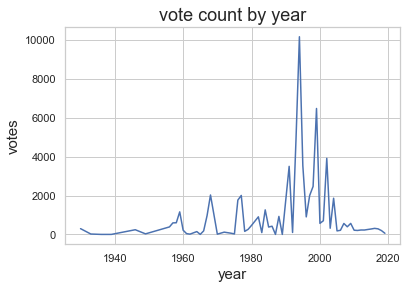

In [40]:
sns.set(style="whitegrid")
sns.lineplot(data=df3, x="release_year", y="vote_count", ci=None)
plt.title("vote count by year",fontsize=18)
plt.xlabel("year",fontsize=15)
plt.ylabel("votes",fontsize=15)
plt.show()

###  3.2: Analysing `tmdb.movies.csv ` (df2)

In [41]:
df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


### 3.2.1: Which movie has the highest Worldwide gross?

In [42]:
df2.sort_values(by="worldwide_gross", ascending=False)
df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


### 3.2.2: Which movies made the highest gross profit world_wide and locally?

In [43]:
# Calculating and creating a new column "world_wide_gross_profit"
df2['world_wide_gross_profit'] = df2['worldwide_gross']-df2['production_budget']

In [44]:
# Calculating and creating a new column "worldwide_percentage-profit"
df2['worldwide_percentage_profit'] = (df2['world_wide_gross_profit']/df2['production_budget'])*100

In [45]:
# Sorting the data to view the movies with the highest worldwide profit
df2.sort_values(by="worldwide_percentage_profit", ascending=False)[:10]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,world_wide_gross_profit,worldwide_percentage_profit
id,,,,,,,,
46,1972-06-30,Deep Throat,25000,45000000,45000000,1972,44975000,179900.000000
14,1980-03-21,Mad Max,200000,8750000,99750000,1980,99550000,49775.000000
93,2009-09-25,Paranormal Activity,450000,107918810,194183034,2009,193733034,43051.785333
80,2015-07-10,The Gallows,100000,22764410,41656474,2015,41556474,41556.474000
7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,1999,247700000,41283.333333
10,2004-05-07,Super Size Me,65000,11529368,22233808,2004,22168808,34105.858462
47,1942-08-13,Bambi,858000,102797000,268000000,1942,267142000,31135.431235
74,1993-02-26,El Mariachi,7000,2040920,2041928,1993,2034928,29070.400000
77,1968-10-01,Night of the Living Dead,114000,12087064,30087064,1968,29973064,26292.161404


In [46]:
# Calculating and creating a new column "domestic_gross_profit"
df2['domestic_gross_profit'] = df2['domestic_gross']-df2['production_budget']

In [47]:
# Calculating and creating a new column "domestic_percentage-profit"
df2['domestic_percentage_profit'] = df2['domestic_gross']/df2['production_budget']*10

In [48]:
# Sorting the data to view the movies with the highest domestic profit
df2.sort_values(by="domestic_percentage_profit", ascending=False)[:10]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,world_wide_gross_profit,worldwide_percentage_profit,domestic_gross_profit,domestic_percentage_profit
id,,,,,,,,,,
46,1972-06-30,Deep Throat,25000,45000000,45000000,1972,44975000,179900.000000,44975000,18000.000000
74,1993-02-26,El Mariachi,7000,2040920,2041928,1993,2034928,29070.400000,2033920,2915.600000
93,2009-09-25,Paranormal Activity,450000,107918810,194183034,2009,193733034,43051.785333,107468810,2398.195778
7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,1999,247700000,41283.333333,139939099,2342.318317
80,2015-07-10,The Gallows,100000,22764410,41656474,2015,41556474,41556.474000,22664410,2276.441000
16,1995-08-09,The Brothers McMullen,50000,10426506,10426506,1995,10376506,20753.012000,10376506,2085.301200
66,1974-10-18,The Texas Chainsaw Massacre,140000,26572439,26572439,1974,26432439,18880.313571,26432439,1898.031357
10,2004-05-07,Super Size Me,65000,11529368,22233808,2004,22168808,34105.858462,11464368,1773.748923
82,2005-08-05,My Date With Drew,1100,181041,181041,2005,179941,16358.272727,179941,1645.827273


### 3.2.3: What is the relationship between a movie budget and the reception it gets?

In [49]:
# Finding the relationship between a movies' production budget and how it sells world wide
df2['production_budget'].corr(df2['world_wide_gross_profit'])

0.6087521471718846

There is a positive relationship between a movies budget and the reception it gets worldwide\
The higher the movie budget the high positive reception it gets.

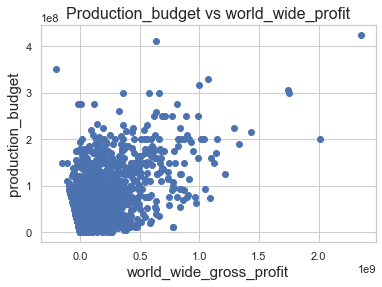

In [50]:
# Plotting a scatter plot to visualize
plt.scatter(df2.world_wide_gross_profit, df2.production_budget)
plt.title('Production_budget vs world_wide_profit',fontsize=16)
plt.xlabel("world_wide_gross_profit",fontsize=15)
plt.ylabel("production_budget",fontsize=15)
plt.show();

In [51]:
# Finding the relationship between a movies' production budget and how it sells locally
df2['production_budget'].corr(df2['domestic_gross_profit'])

0.09974209165512304

We can interprate this to movies with high budget do not do sell domestically

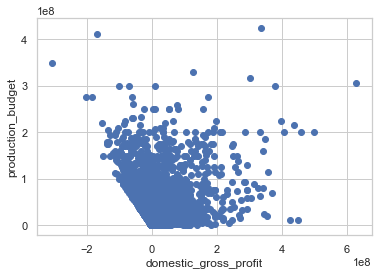

In [52]:
# Plotting a scatter plot to visualize
plt.scatter(df2.domestic_gross_profit, df2.production_budget)
plt.xlabel("domestic_gross_profit")
plt.ylabel("production_budget")
plt.show();

##  3.3 Analysing `bom.movie_gross.csv` AS df

In [55]:
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018
3386,An Actor Prepares,Grav.,1700.0,0.0,2018


In [56]:
# How many studios does the data set have?
df['studio'].nunique()

258

### 3.3.1: Which studios generates the highest  gross?

In [57]:
# Studio with the heighest Domestic gross
studio_with_highest_dom_gross = df.groupby(['studio'])["domestic_gross"].sum()
studio_with_highest_dom_gross.sort_values(ascending=False)

studio
BV            1.841903e+10
Uni.          1.290239e+10
WB            1.216805e+10
Fox           1.094950e+10
Sony          8.459683e+09
                  ...     
ALP           2.800000e+03
Synergetic    2.400000e+03
DR            8.000000e+02
PI            0.000000e+00
Myr.          0.000000e+00
Name: domestic_gross, Length: 258, dtype: float64

In [58]:
# Studio with the heighest foreign gross
studio_with_highest_for_gross = df.groupby(['studio'])["foreign_gross"].sum()
studio_with_highest_for_gross.sort_values(ascending=False)

studio
BV        2.579385e+10
Fox       2.005587e+10
WB        1.866790e+10
Uni.      1.685477e+10
Sony      1.394535e+10
              ...     
DLA       0.000000e+00
RME       0.000000e+00
Rel.      0.000000e+00
KS        0.000000e+00
CFilms    0.000000e+00
Name: foreign_gross, Length: 258, dtype: float64

### 3.3.2: Whats the  gross distribution per year?

In [59]:
# Finding the years in the dataset
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

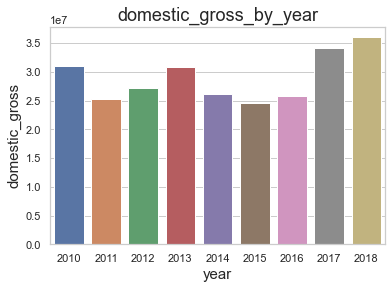

In [60]:
# domestic gross
sns.barplot(x="year", y="domestic_gross", data=df, ci=None)
plt.title("domestic_gross_by_year",fontsize=18)
plt.xlabel("year",fontsize=15)
plt.ylabel("domestic_gross",fontsize=15)
plt.show()

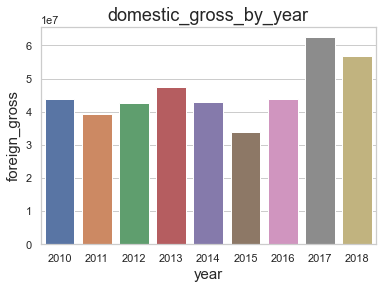

In [61]:
# foreign gross
sns.barplot(x="year", y="foreign_gross", data=df, ci=None)
plt.title("domestic_gross_by_year",fontsize=18)
plt.xlabel("year",fontsize=15)
plt.ylabel("foreign_gross",fontsize=15)
plt.show()

## 3.4: Analysing `im.db` tables

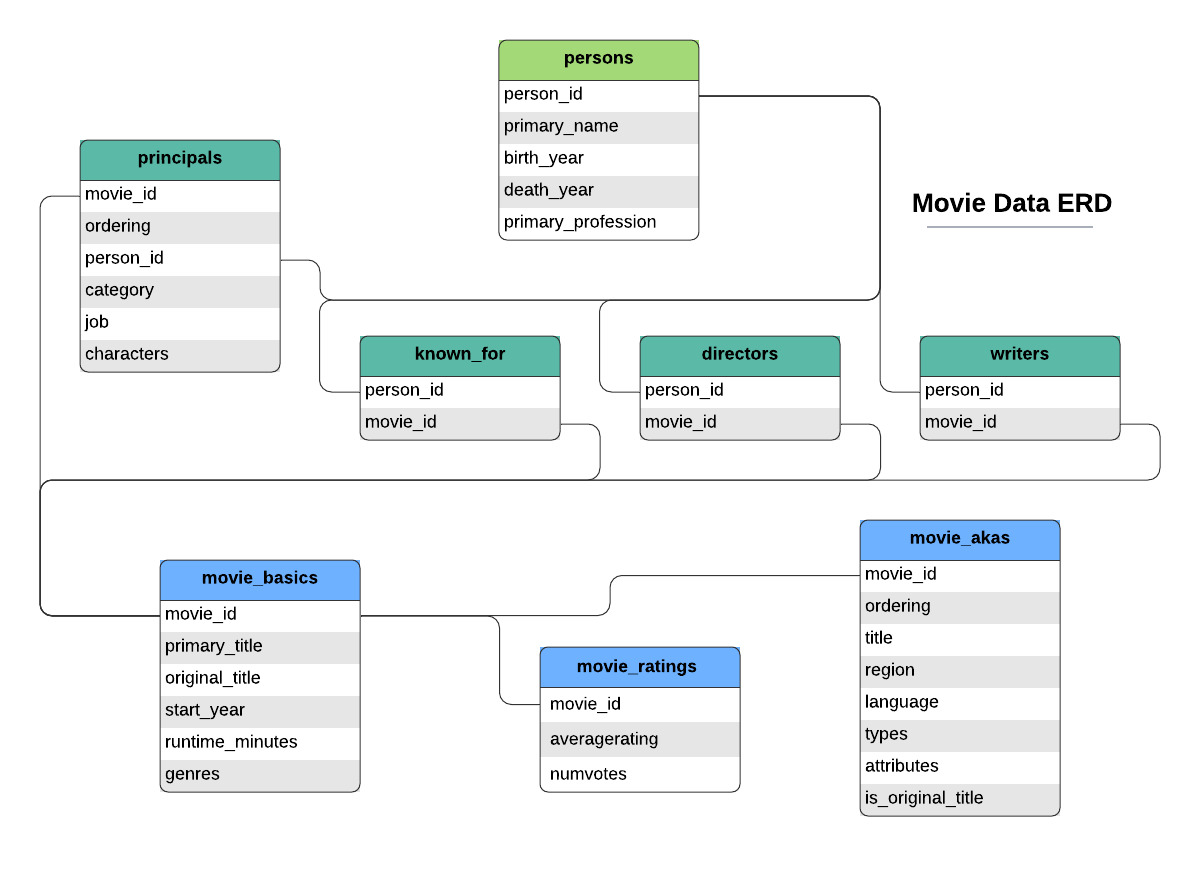

In [62]:
conn = sqlite3.connect('im.db')

In [63]:
# Selecting the table names
tables_name = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(tables_name, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [64]:
# lets see how many genre do we have do we have
genres = """
   SELECT genres
     FROM movie_basics
 GROUP BY genres

;
"""
data = pd.read_sql(genres ,conn).dropna()
data.count()

genres    1085
dtype: int64

###  3.4.1: Which Are The Top Genres?

In [65]:
genre_ratings = """
   SELECT genres,avg(averagerating) AS average_ratings
     FROM movie_basics
     JOIN movie_ratings
    USING(movie_id)
 GROUP BY genres
 ORDER BY average_ratingS DESC
 


;
"""
pd.read_sql(genre_ratings, conn).dropna()

,genres,average_ratings
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0
...,...,...
919,"Crime,Music",2.4
920,"History,Sci-Fi,Thriller",2.3
921,"Adventure,Crime,Romance",2.3
922,"Adult,Horror",2.0


### 3.4.2: Which are the most viewed genres?

In [66]:
genre_ratings = """
   SELECT genres,sum(numvotes) AS People_viewed
     FROM movie_basics
     JOIN movie_ratings
    USING(movie_id)
 GROUP BY genres
 ORDER BY people_viewed desc

 


;
"""
pd.read_sql(genre_ratings, conn).dropna()

,genres,People_viewed
0,"Action,Adventure,Sci-Fi",23023248
1,"Action,Adventure,Fantasy",9658883
2,"Adventure,Animation,Comedy",8687435
3,Drama,8395521
4,"Comedy,Drama,Romance",7665463
...,...,...
919,"Family,War",5
920,"Crime,Western",5
921,"Comedy,Documentary,Fantasy",5
922,"Action,Documentary,Horror",5


### 3.4.1: Does the numbers of viewers relate with the ratings?

In [69]:
genre_counts = """
   SELECT genres, sum(numvotes) AS people_viewed, avg(averagerating) as average_rating
     FROM movie_basics
     JOIN movie_ratings
    USING(movie_id)
 GROUP BY genres
 HAVING people_viewed  between 1000 and 50000
   AND average_rating  between 5.5 and 8
 ORDER BY people_viewed desc
 



;
"""
pd.read_sql(genre_counts, conn)
data = pd.read_sql(genre_counts, conn).dropna()
data

,genres,people_viewed,average_rating
0,"Drama,History,Music",49789,6.800000
1,"Animation,Drama",49496,6.820000
2,"Biography,Documentary,Thriller",49136,7.766667
3,"Comedy,Fantasy,Sci-Fi",48811,6.121429
4,"Action,Animation,Crime",48665,6.855556
...,...,...,...
239,"Adventure,Comedy,Thriller",1115,6.850000
240,"Fantasy,Romance,Thriller",1110,6.975000
241,"Action,Sport",1055,6.350000
242,"Comedy,Family,Music",1018,6.120000


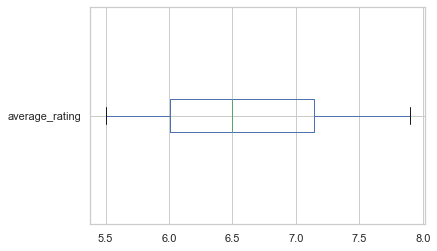

In [70]:
# Find outliers from ratings
data["average_rating"].plot(kind='box',vert=False,showfliers=False);

[]

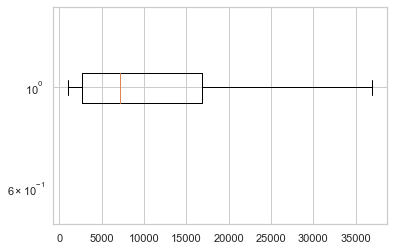

In [71]:
# find outliers from people viewed
plt.boxplot(x=data['people_viewed'], vert=False,showfliers=False);
plt.semilogy()

In [72]:
data["average_rating"].corr(data["people_viewed"])

0.06824764666660994

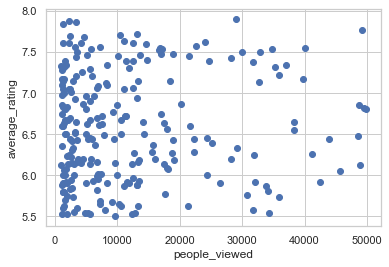

In [73]:
plt.scatter(data.people_viewed, data.average_rating)
plt.xlabel("people_viewed")
plt.ylabel("average_rating")
plt.show();

There is no relationship between number of people viewing a genre and it's rating

### 3.4.2: Does a movie length affect its rating?

In [122]:
movie_length = """
  SELECT movie_id, runtime_minutes AS length, averagerating AS rating
    FROM movie_basics
    JOIN movie_ratings
    USING(movie_id)
GROUP BY movie_id
HAVING length < 200
LIMIT 1000


    


"""
data2 = pd.read_sql(movie_length, conn).dropna()
data2

,movie_id,length,rating
0,tt0063540,175.0,7.0
1,tt0066787,114.0,7.2
2,tt0069049,122.0,6.9
3,tt0100275,80.0,6.5
4,tt0137204,83.0,8.1
...,...,...,...
995,tt1151919,80.0,1.9
996,tt1152278,46.0,7.5
997,tt1152286,79.0,8.0
998,tt1152398,86.0,5.6


In [119]:
data2.describe()

,length,rating
count,66073.000000,66073.000000
mean,93.174549,6.319415
std,22.035761,1.457524
min,3.000000,1.000000
25%,81.000000,5.500000
50%,91.000000,6.500000
75%,104.000000,7.300000
max,199.000000,10.000000


In [120]:
# Finding relationship between movie rating and legnth
data = pd.read_sql(movie_length,conn).dropna()
data2["rating"].corr(data2["length"])

-0.05167249735746264

Text(0.5, 1.0, 'Movie_length and Rating')

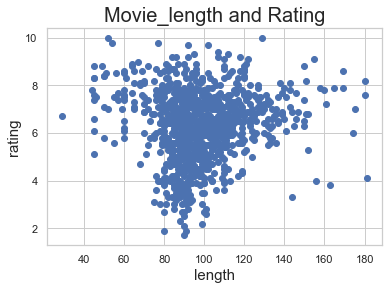

In [123]:
# Plotting a scatter plot
plt.scatter(data2.length, data2.rating)
plt.xlabel("length",fontsize=15)
plt.ylabel("rating",fontsize=15)
plt.title("Movie_length and Rating",fontsize=20)

A movie legnth does not affect its rating

### 3.4.3: Who are the best directors?

In [124]:
# first lets find how many directors we have
directors_details = """
  SELECT person_id AS director_id, primary_name AS director_name
    FROM directors
    JOIN persons
   USING(person_id)
GROUP BY person_id
;
"""
data3 = pd.read_sql(directors_details,conn)
data3.count()

director_id      109251
director_name    109251
dtype: int64

In [125]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109251 entries, 0 to 109250
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   director_id    109251 non-null  object
 1   director_name  109251 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


We have 109,251 directors is our data set.

### 3.4.4:  Out of the Director Movie rated which director has the heighest rating?

In [131]:
directors_ratings = """
  SELECT person_id AS director_id, primary_name As director_name, COUNT(movie_id) AS movies_rated, avg(averagerating) AS director_movies_average_rating
    FROM directors
LEFT JOIN persons
USING(person_id)
    JOIN movie_ratings
    USING(movie_id)
GROUP BY director_id
HAVING movies_rated > 5
ORDER BY director_movies_average_rating DESC



 
    
;
"""
data4 = pd.read_sql(directors_ratings,conn)
data4

,director_id,director_name,movies_rated,director_movies_average_rating
0,nm9706013,Fan Li,7,9.214286
1,nm5605726,Damir Radic,7,9.200000
2,nm9425689,Nuo Wang,10,9.100000
3,nm9337462,Renjie,6,9.100000
4,nm5083382,Corey Lubowich,12,9.100000
...,...,...,...,...
6704,nm3087956,Chihiro Ikeda,13,1.300000
6705,nm6594610,Eldar Bogunov,23,1.295652
6706,nm5292466,Keiko Tsuruoka,8,1.250000
6707,nm8395992,Andrey Gromov,11,1.081818


### 3.4.5:  Out of the Director Movie rated which director has the heighest number of movies?

In [143]:
directors_ratings = """
  SELECT person_id AS director_id, primary_name As director_name, COUNT(movie_id) AS movies_rated, avg(averagerating) AS director_movies_average_rating
    FROM directors
LEFT JOIN persons
USING(person_id)
    JOIN movie_ratings
    USING(movie_id)
GROUP BY director_id
HAVING movies_rated > 5
ORDER BY movies_rated desc



 
    
;
"""
data6 = pd.read_sql(directors_ratings,conn)
data6

,director_id,director_name,movies_rated,director_movies_average_rating
0,nm6935209,Tony Newton,217,5.131336
1,nm2563700,Jason Impey,180,5.339444
2,nm1546474,Shane Ryan,177,5.498305
3,nm3877467,Ruben Rodriguez,150,5.854000
4,nm6078996,Martin Sonntag,135,5.548889
...,...,...,...,...
6704,nm0000517,Terrence Malick,6,6.333333
6705,nm0000513,William H. Macy,6,6.200000
6706,nm0000365,Julie Delpy,6,5.966667
6707,nm0000329,Jackie Chan,6,6.033333


### 3.4.6: Do we have a relationship between movie ratings and number of movie rated?

In [146]:
data5["director_movies_average_rating"].corr(data5["movies_rated"])

-0.023868139052040636

No relationship between directors_movies_rated and the movies rating

Text(0, 0.5, 'average_rating')

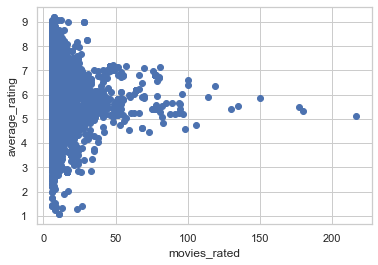

In [149]:
plt.scatter(data5.movies_rated, data5.director_movies_average_rating)
plt.xlabel("movies_rated")
plt.ylabel("average_rating")

### 3.4.7: What is the average movie length?

In [162]:
movie_durations = """
  SELECT movie_id,avg(runtime_minutes) AS average_runtime,start_year
    FROM movie_basics
 GROUP BY start_year
 


 
    
;
"""
data7 = pd.read_sql(movie_durations,conn)
data7.dropna()

,movie_id,average_runtime,start_year
0,tt0146592,85.495694,2010
1,tt0176694,86.410106,2011
2,tt0139613,89.208856,2012
3,tt0063540,84.931670,2013
4,tt0329539,84.541500,2014
5,tt0283440,85.407108,2015
6,tt0315642,84.974249,2016
7,tt0100275,85.732214,2017
8,tt0069049,87.661099,2018
9,tt0066787,90.887358,2019


Text(0, 0.5, 'number_of_movies')

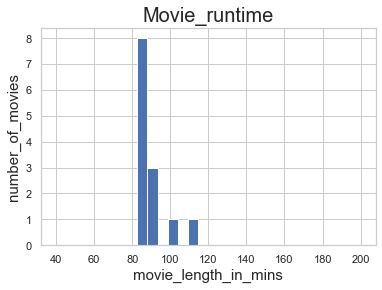

In [167]:
# runtime by movies
plt.hist(data7['average_runtime'],range=(40,200),bins=30)
plt.title("Movie_runtime",fontsize=20)
plt.xlabel("movie_length_in_mins",fontsize=15)
plt.ylabel("number_of_movies",fontsize=15)

In [193]:
# Create year range of 5 years
runtime_by_year = data7.copy()
runtime_by_year["start_year"] = ((runtime_by_year['start_year']//5)*5).astype("int64")

<AxesSubplot:xlabel='start_year', ylabel='average_runtime'>

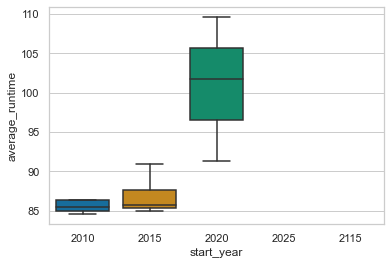

In [195]:
# Plotting boxplot to visualize
sns.boxplot(x="start_year",y="average_runtime",data=runtime_by_year, palette='colorblind', showfliers=False)